### One-Dimensional Aggregation: Paper Metadata

In [2]:
exportdate = 20180327
projectname = 'repract'

The usual preparations...

In [3]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import datetime
now = datetime.datetime.now().strftime('%Y%m%d')

In [4]:
%matplotlib notebook

In [5]:
sns.set_style('darkgrid')

In [6]:
df = pd.read_csv(f'../analysis/{exportdate}{projectname}_evaluation_counts_with_papermeta.csv')
df.head(1)

,PaperID,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings,Venue,Year,TotalPages,IndTrack,AcadVsInd,Title,Authors,Summary
0,248,2,5,6,0,0,141,7,6,13,ICSE,2014,10,No,Academic,Requirements fixation,"Rahul Mohanani, Paul Ralph, Ben Shreeve",An experiment with students on the effects of ...


In [7]:
nozeroes = df[[col for col in df.columns if col not in ['ZeroRating', 'NotShown']]]
nozeroes.head(1)

,PaperID,Essential,Worthwhile,Unimportant,Unwise,PosRatings,NegRatings,TotalRatings,Venue,Year,TotalPages,IndTrack,AcadVsInd,Title,Authors,Summary
0,248,2,5,6,0,7,6,13,ICSE,2014,10,No,Academic,Requirements fixation,"Rahul Mohanani, Paul Ralph, Ben Shreeve",An experiment with students on the effects of ...


In [15]:
def percentages(df, totalscolumn):
    ndf = pd.DataFrame(df, copy=True)
    for col in df.columns:
        if col != totalscolumn:
            ndf[col] = df[col] / df[totalscolumn]
    return ndf
    
def colslice(df, fro, to):
    return df[list(df.columns.values)[fro:to]]

def graphic(df, fro, to, groupby, 
            absolute=False, sortby='PosRatings', bbox_to_anchor=None, groupbyname=None, 
            save=None):
    if not absolute:
        colslice(
            percentages(
                nozeroes.groupby(groupby).sum()[
                    list(df.columns.values)[1:8]], 'TotalRatings'
            ).sort_values(sortby, ascending=False), fro, to
        ).plot.barh(rot=0, stacked=True, colormap='bwr', alpha=0.75)
        plt.xlim(0,1)
    else:
        colslice(
            nozeroes.groupby(groupby).sum()[
                    list(df.columns.values)[1:8]].sort_values(sortby, ascending=False), fro, to
        ).plot.barh(rot=0, stacked=True, colormap='bwr', alpha=0.75)
    
    title = groupby if not groupbyname else groupbyname
    plt.title(f'Evaluations by {title}')
    
    plt.ylabel('')
    
    plt.xlabel(f'{"Percentage" if not absolute else "Number"} of Evaluations')
    plt.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor);
    if save:
        plt.savefig(f'../graphics/{save}_Papers_{title.replace(" ", "_")}_{"abs" if absolute else "rel"}.pdf')

In [16]:
ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']

### By Conference Venue

In [17]:
percentages(df.groupby('Venue').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings
Venue,,,,,,,,,
REFSQ,0.270370,0.490741,0.209259,0.029630,0.064815,31.161111,0.761111,0.238889,540
RE,0.229588,0.468068,0.257074,0.045271,0.070331,29.430881,0.697656,0.302344,1237
ICSE,0.266667,0.415385,0.276923,0.041026,0.056410,29.743590,0.682051,0.317949,195
FSE,0.235294,0.441176,0.264706,0.058824,0.117647,35.117647,0.676471,0.323529,34
ESEM,0.173554,0.429752,0.338843,0.057851,0.057851,26.942149,0.603306,0.396694,121
ESEC/FSE,0.270270,0.297297,0.351351,0.081081,0.054054,32.243243,0.567568,0.432432,37


Counts

<IPython.core.display.Javascript object>


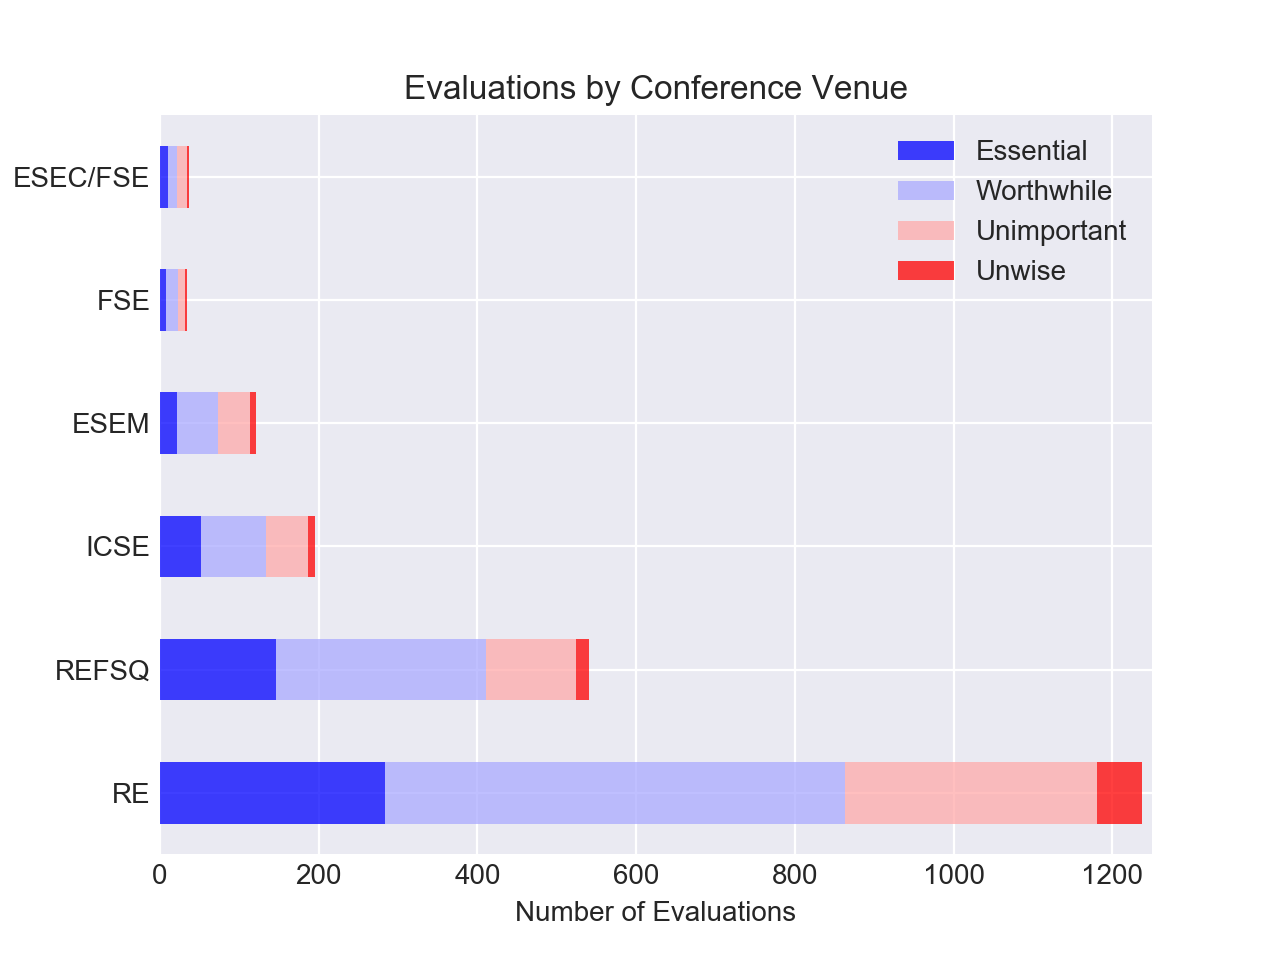

In [18]:
graphic(nozeroes, 0,4,'Venue', absolute=True, groupbyname='Conference Venue', save=now)
plt.xlim(0,1250);

Percentages

<IPython.core.display.Javascript object>


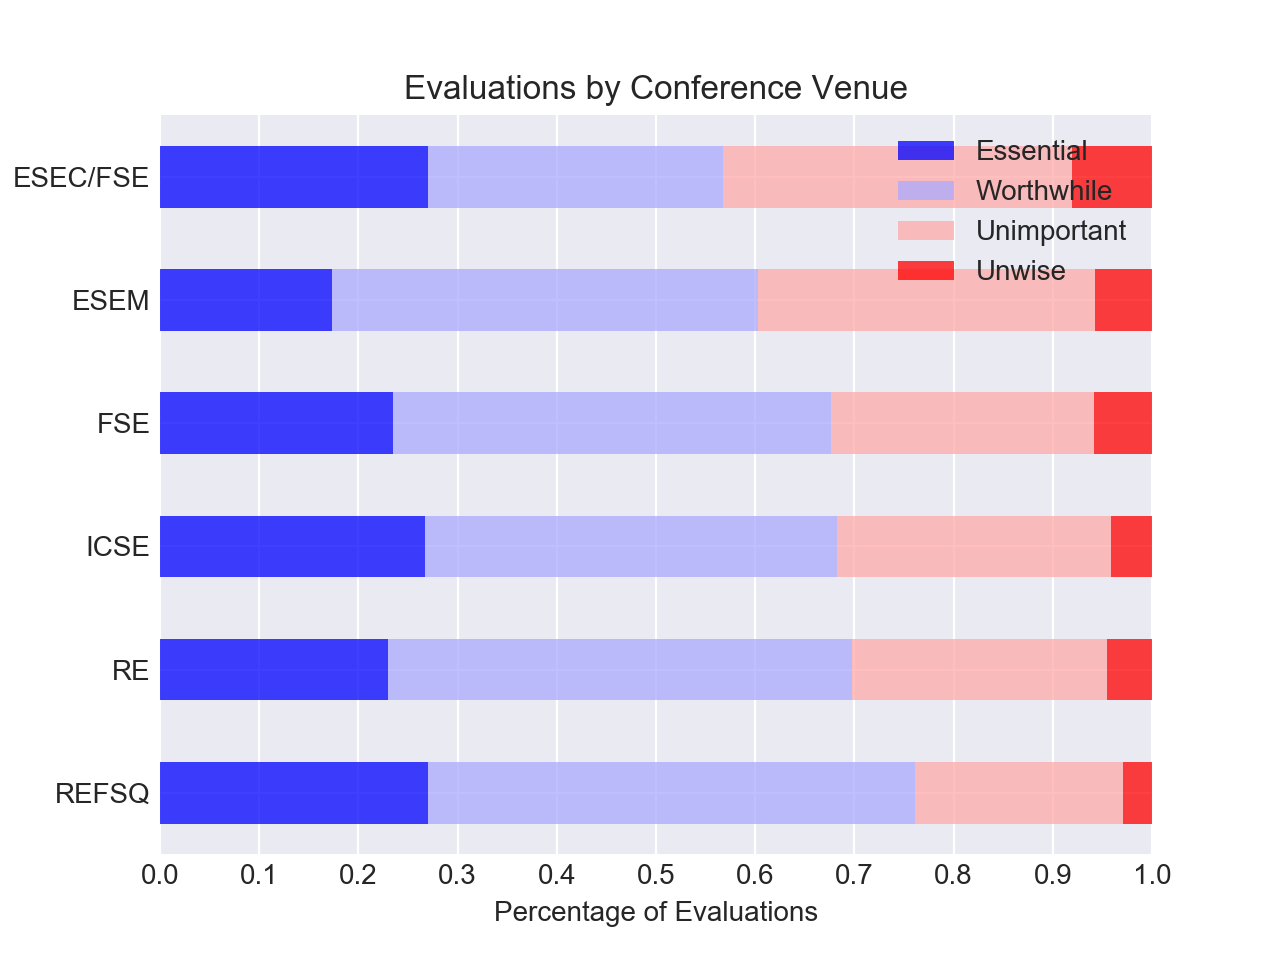

In [19]:
graphic(nozeroes, 0,4,'Venue', groupbyname='Conference Venue', save=now)
plt.xticks(np.arange(0,1.1,0.1));

### By Year

In [20]:
percentages(df.groupby('Year').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,NotShown,PosRatings,NegRatings,TotalRatings
Year,,,,,,,,,
2010,0.269592,0.492163,0.200627,0.037618,0.065831,28.382445,0.761755,0.238245,319
2011,0.263359,0.477099,0.221374,0.038168,0.095420,28.881679,0.740458,0.259542,262
2012,0.218978,0.518248,0.226277,0.036496,0.054745,30.981752,0.737226,0.262774,274
2013,0.262570,0.424581,0.265363,0.047486,0.075419,29.896648,0.687151,0.312849,358
2015,0.228571,0.453061,0.281633,0.036735,0.044898,29.755102,0.681633,0.318367,245
2014,0.224658,0.454795,0.271233,0.049315,0.063014,32.268493,0.679452,0.320548,365
2016,0.217009,0.439883,0.296188,0.046921,0.070381,28.736070,0.656891,0.343109,341


Counts

<IPython.core.display.Javascript object>


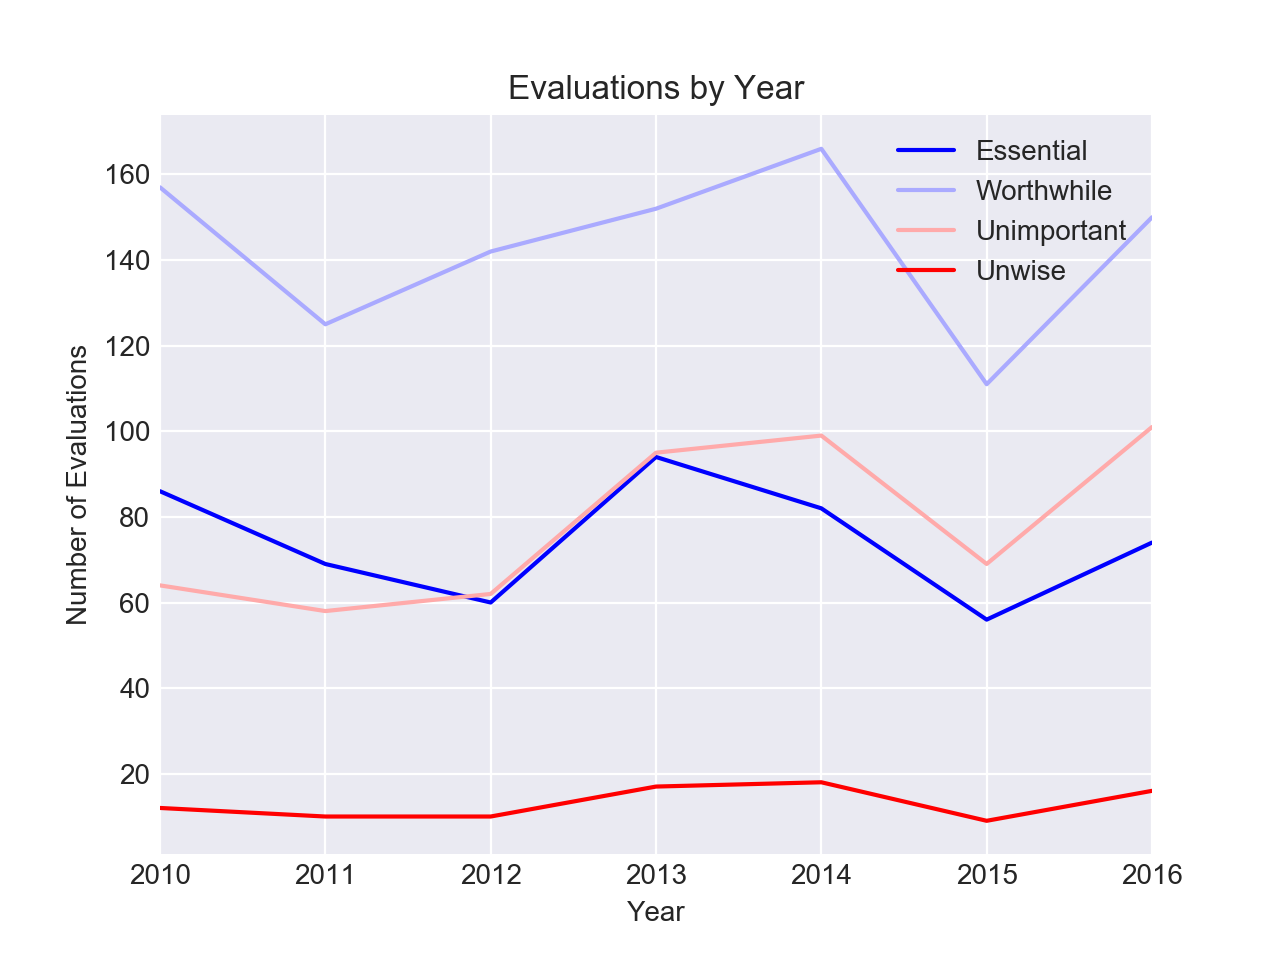

In [22]:
df.groupby('Year').sum()[list(df.columns.values)[1:10]][ratings].plot(cmap='bwr')
plt.xlim(2010,2016)
plt.ylabel('Number of Evaluations')
plt.title('Evaluations by Year');
plt.savefig(f'../graphics/{now}_Papers_Year_abs_line.pdf')

<IPython.core.display.Javascript object>


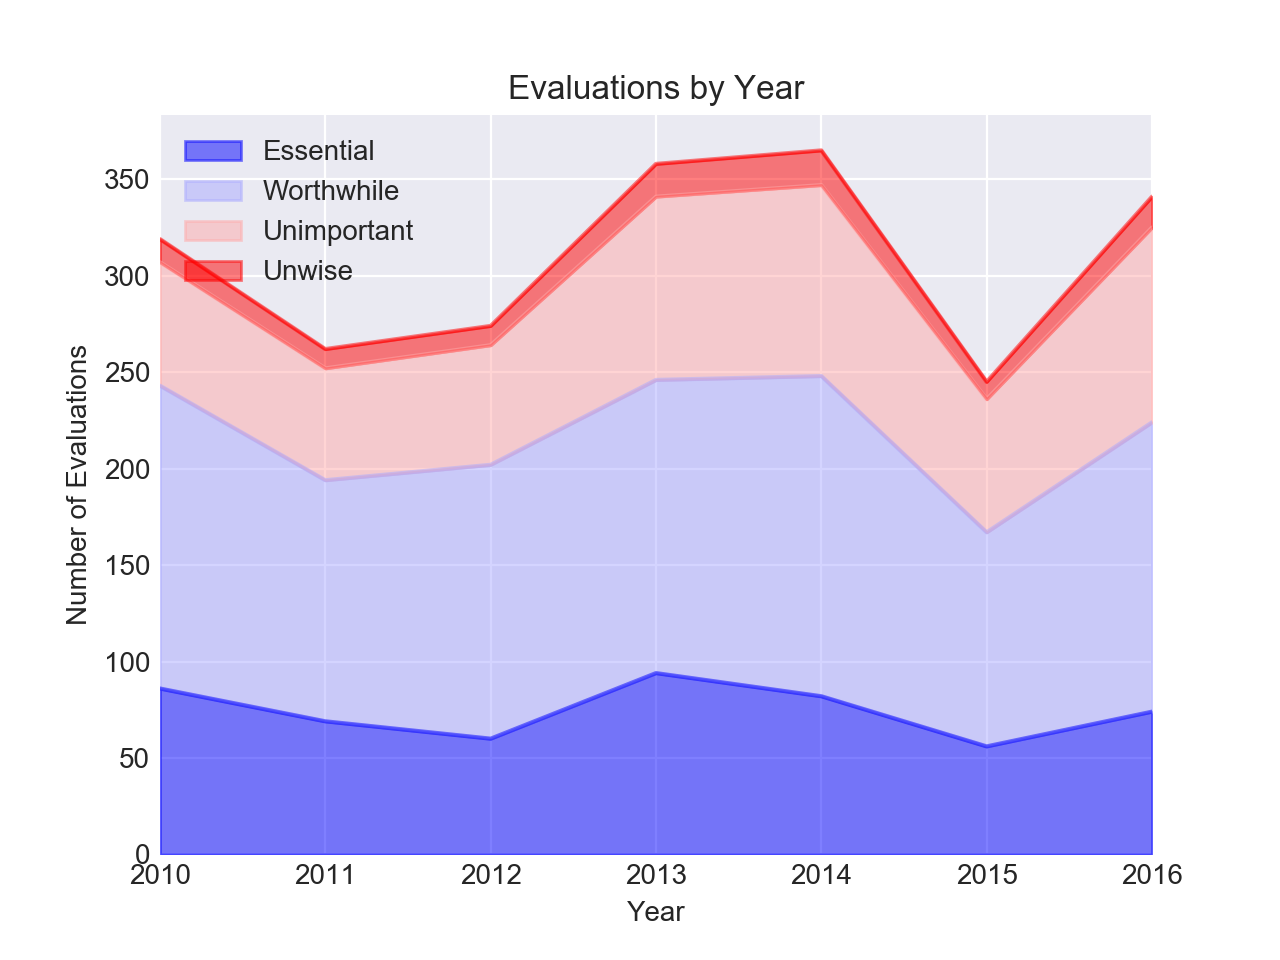

In [23]:
df.groupby('Year').sum()[list(df.columns.values)[1:10]][ratings
                                                       ].plot.area(cmap='bwr', alpha=0.5)
plt.xlim(2010,2016)
plt.ylabel('Number of Evaluations')
plt.legend(loc='upper left')
plt.title('Evaluations by Year');
plt.savefig(f'../graphics/{now}_Papers_Year_abs_area.pdf')

Percentages

<IPython.core.display.Javascript object>


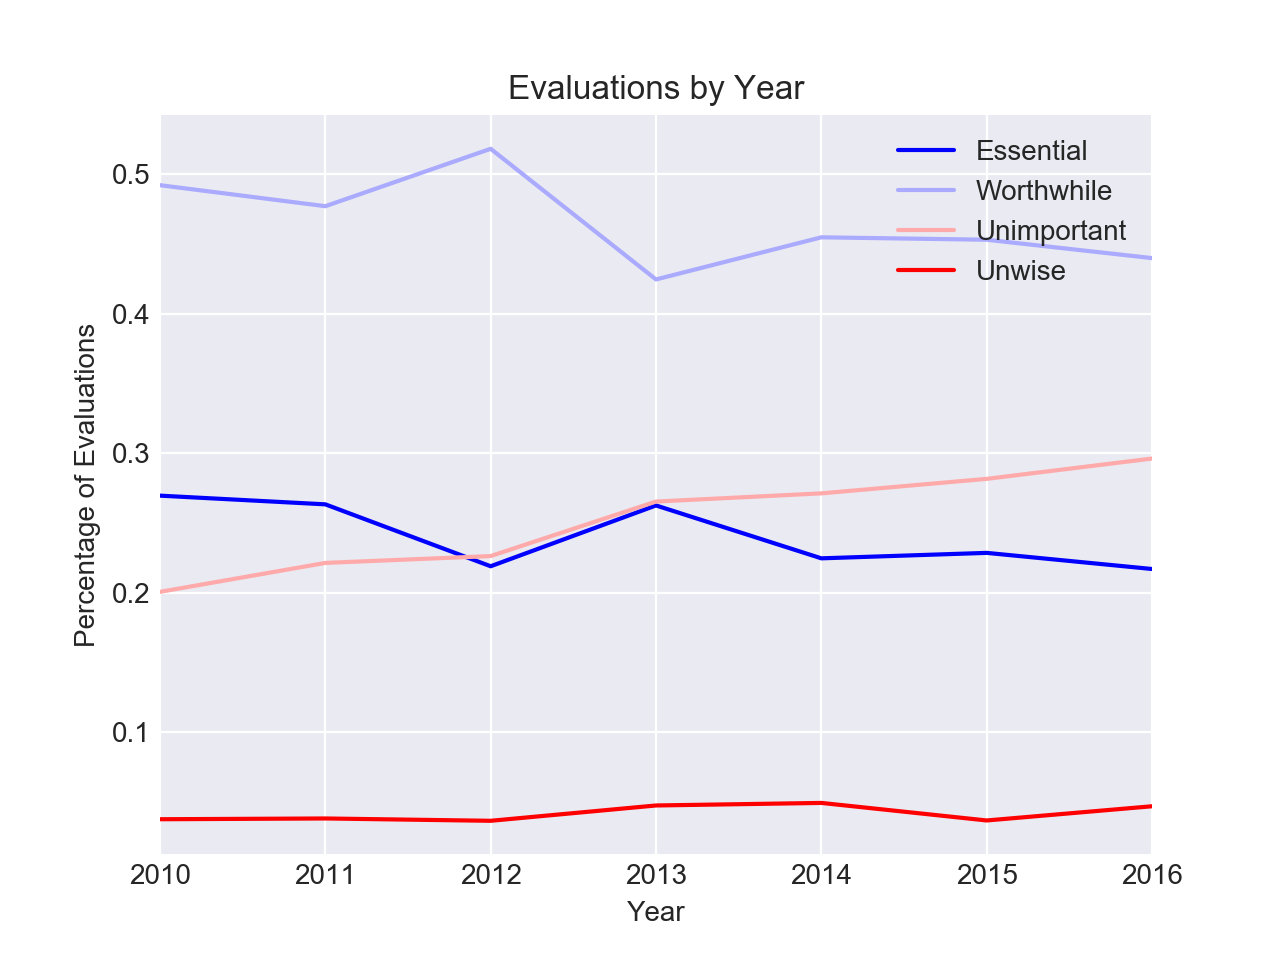

In [24]:
percentages(df.groupby('Year').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings')[ratings].plot(cmap='bwr')
plt.xlim(2010,2016)
plt.ylabel('Percentage of Evaluations')
plt.title('Evaluations by Year');
plt.savefig(f'../graphics/{now}_Papers_Year_rel_line.pdf')

<IPython.core.display.Javascript object>


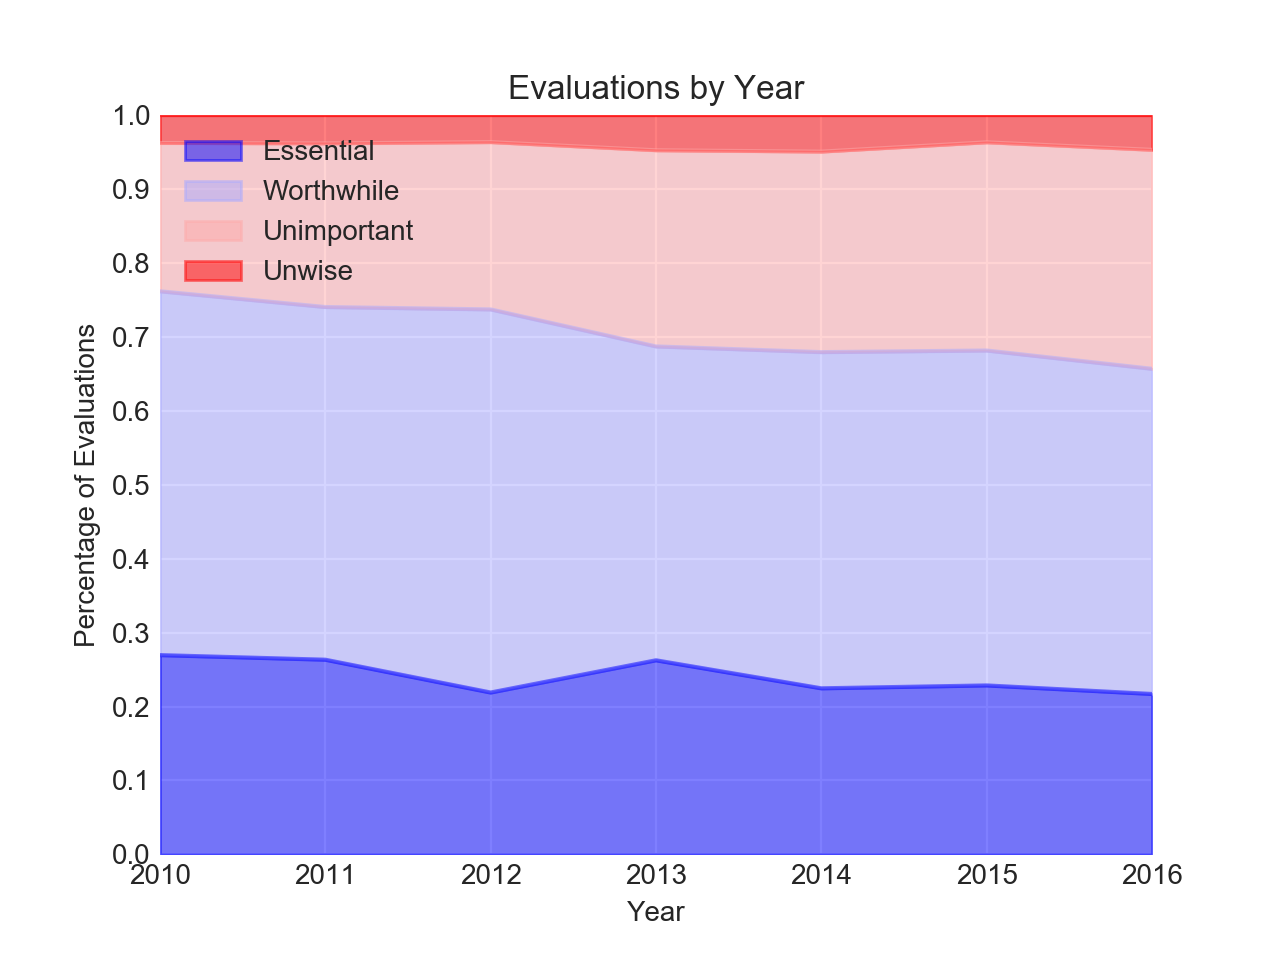

In [25]:
percentages(df.groupby('Year').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings')[ratings].plot.area(cmap='bwr', alpha=0.5)
plt.xlim(2010,2016)
plt.ylim(0,1)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Percentage of Evaluations')
plt.legend(loc='upper left')
plt.title('Evaluations by Year');
plt.savefig(f'../graphics/{now}_Papers_Year_rel_area.pdf')

### Industry Track?

In [26]:
percentages(df.groupby('IndTrack').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').drop('NotShown', axis=1
                                 ).sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,PosRatings,NegRatings,TotalRatings
IndTrack,,,,,,,,
Yes,0.282805,0.454751,0.223982,0.038462,0.056561,0.737557,0.262443,442
No,0.229965,0.465738,0.260743,0.043554,0.070267,0.695703,0.304297,1722


Counts

<IPython.core.display.Javascript object>


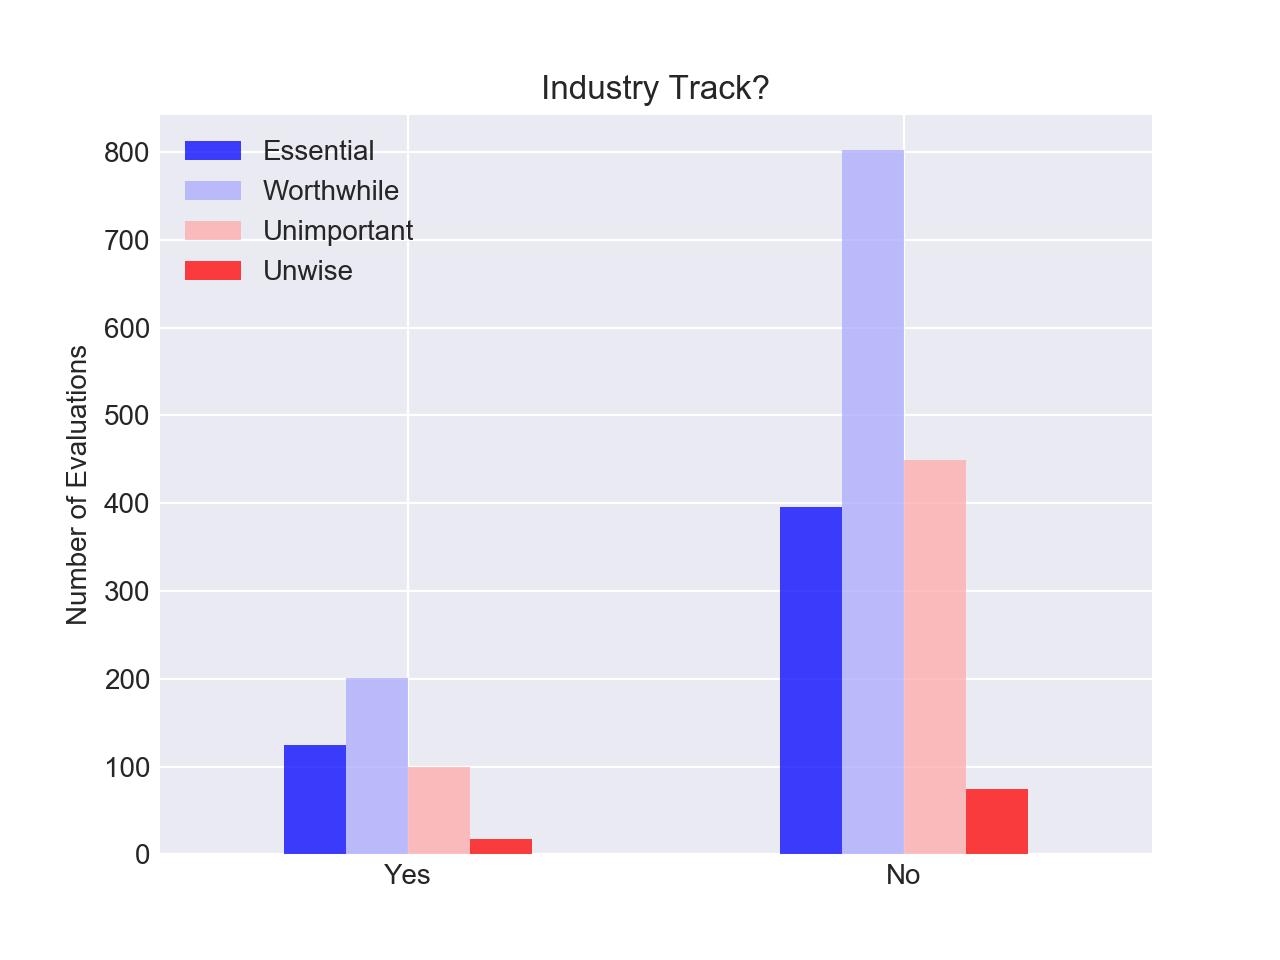

In [27]:
colslice(
    nozeroes.groupby('IndTrack').sum()[
            list(nozeroes.columns.values)[1:8]].sort_values('PosRatings', ascending=True), 0,4
).plot.bar(rot=0, stacked=False, cmap='bwr', alpha=0.75)
plt.xlabel('')
plt.ylabel('Number of Evaluations')
plt.title('Industry Track?')
plt.legend(loc='upper left');
plt.savefig(f'../graphics/{now}_Papers_Industry_Track_abs.pdf')

Percentages

<IPython.core.display.Javascript object>


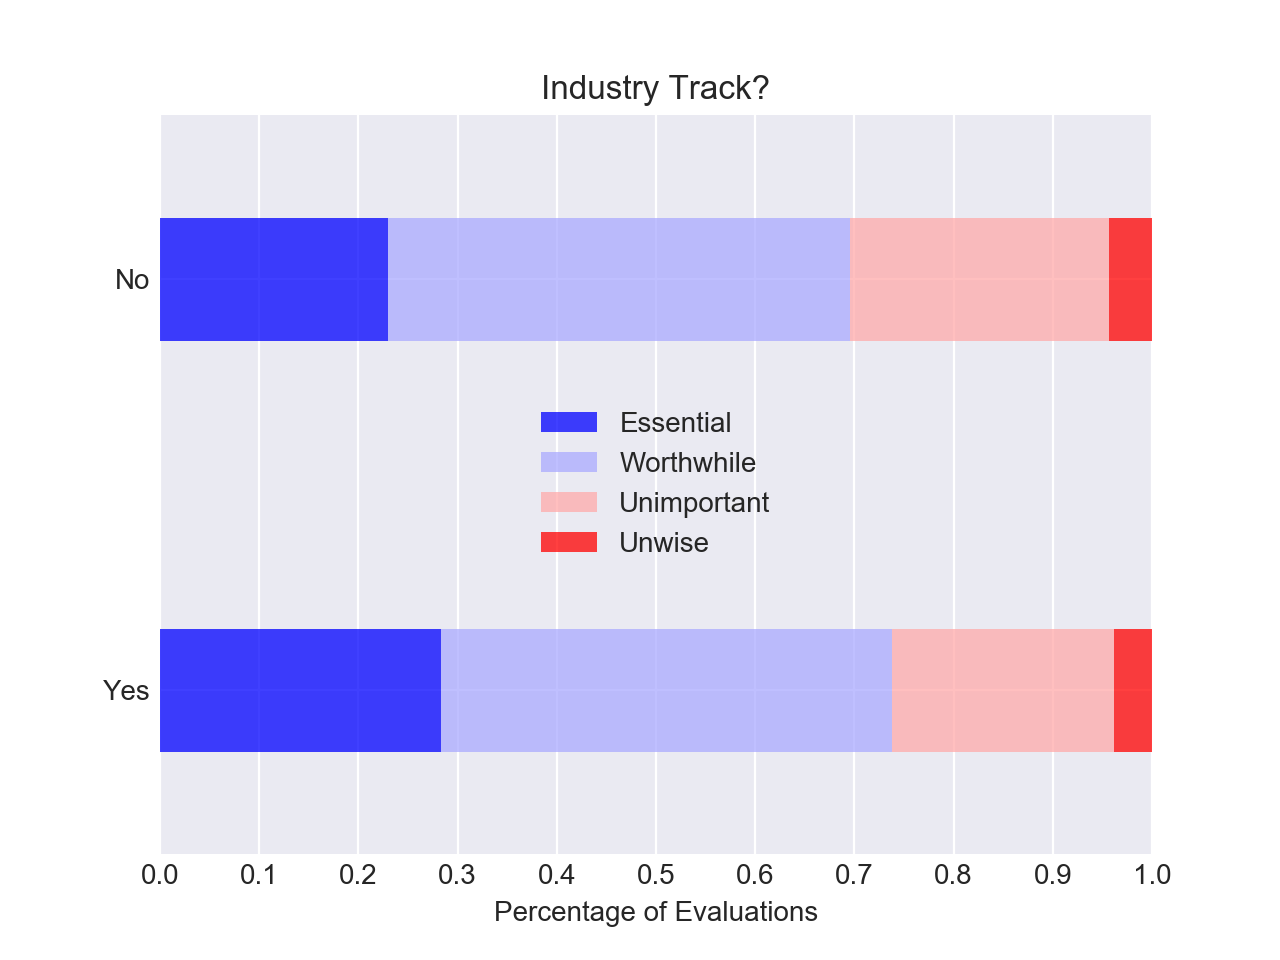

In [28]:
colslice(
    percentages(
        nozeroes.groupby('IndTrack').sum()[
            list(nozeroes.columns.values)[1:8]], 'TotalRatings'
    ).sort_values('PosRatings', ascending=False), 0,4
).plot.barh(rot=0, stacked=True, cmap='bwr', alpha=0.75, width=0.3)
plt.ylabel('')
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel('Percentage of Evaluations')
plt.title('Industry Track?')
plt.legend(loc='center');
plt.savefig(f'../graphics/{now}_Papers_Industry_Track_rel.pdf')

### Academic or Industry Affiliation?

In [29]:
percentages(df.groupby('AcadVsInd').sum()[list(df.columns.values)[1:10]]
           , 'TotalRatings').drop('NotShown',axis=1).sort_values('PosRatings', ascending=False)

,Essential,Worthwhile,Unimportant,Unwise,ZeroRating,PosRatings,NegRatings,TotalRatings
AcadVsInd,,,,,,,,
Mixed,0.241975,0.503704,0.217284,0.037037,0.059259,0.745679,0.254321,405
Industry,0.297619,0.440476,0.214286,0.047619,0.047619,0.738095,0.261905,168
Academic,0.234444,0.455688,0.266499,0.043369,0.071653,0.690132,0.309868,1591


Counts

<IPython.core.display.Javascript object>


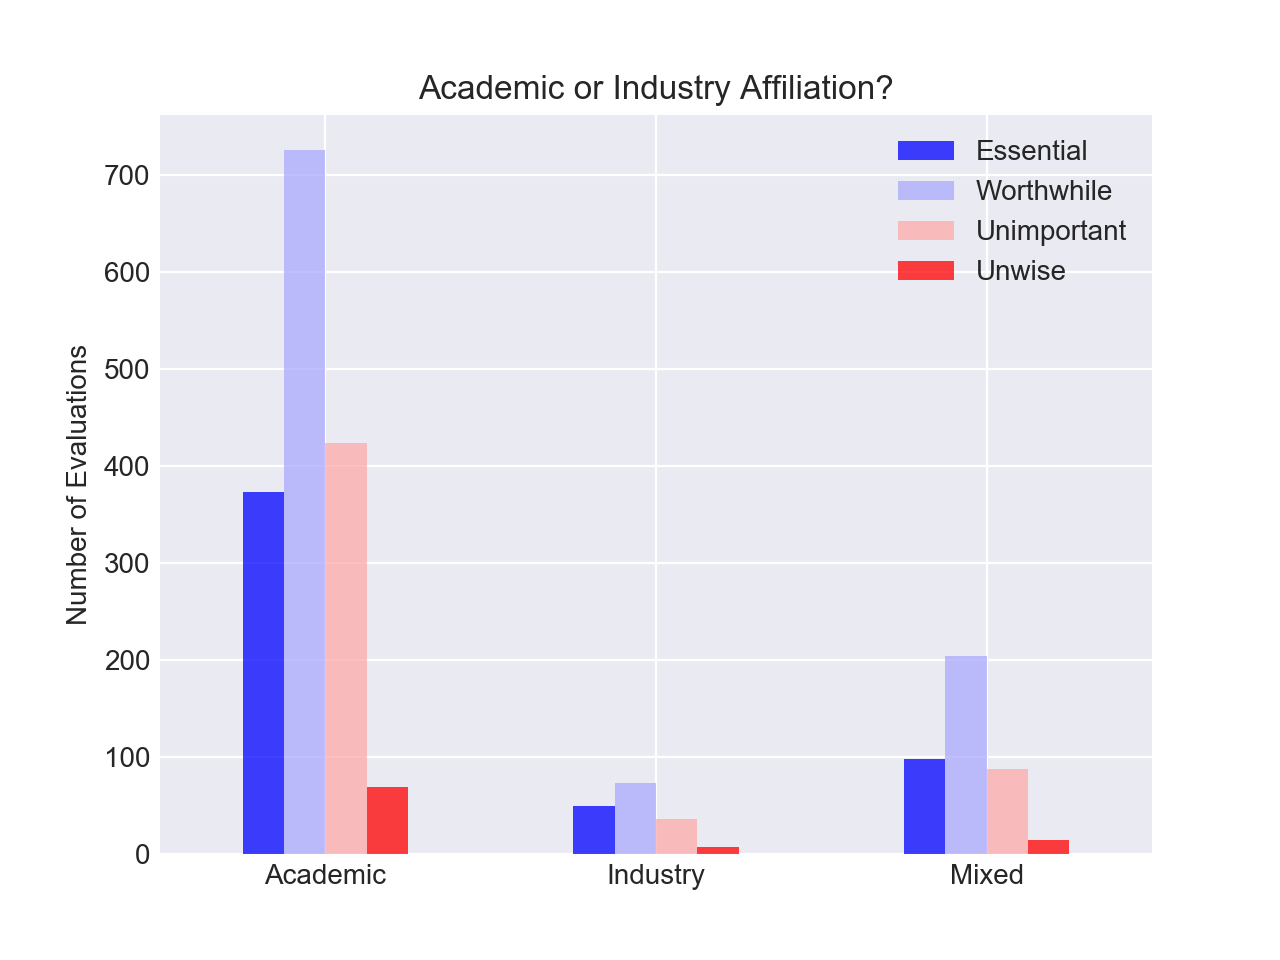

In [30]:
colslice(
    nozeroes.groupby('AcadVsInd').sum()[
            list(nozeroes.columns.values)[1:8]], 0,4
).plot.bar(rot=0, stacked=False, cmap='bwr', alpha=0.75)
plt.xlabel('')
plt.ylabel('Number of Evaluations')
plt.title('Academic or Industry Affiliation?')
plt.legend(loc='upper right');
plt.savefig(f'../graphics/{now}_Papers_Affiliation_abs.pdf')

Percentages

<IPython.core.display.Javascript object>


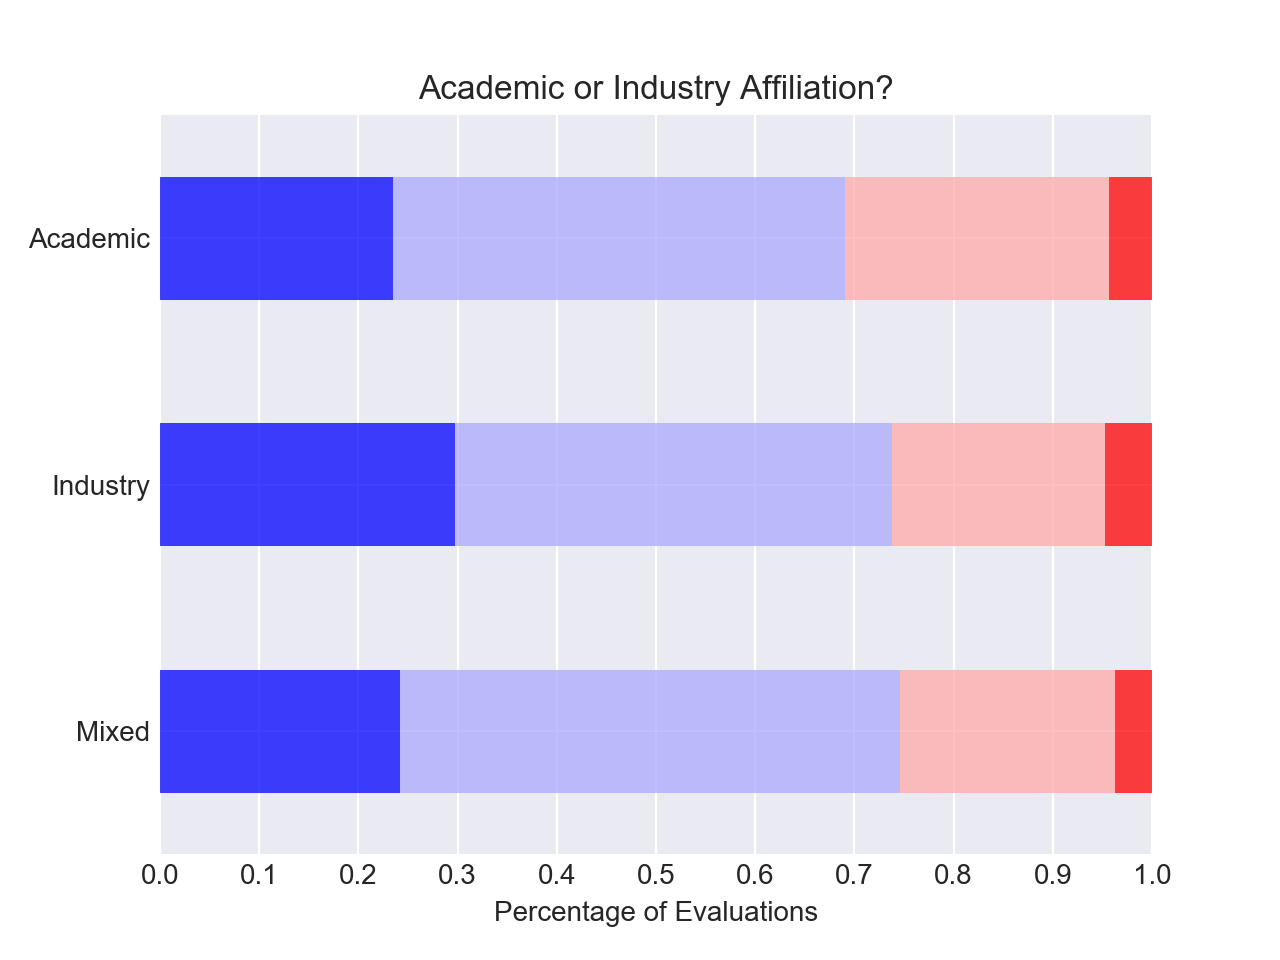

In [31]:
graphic(nozeroes, 0,4,'AcadVsInd')
plt.title('Academic or Industry Affiliation?')
plt.legend([])
plt.xticks(np.arange(0,1.1,0.1));
plt.savefig(f'../graphics/{now}_Papers_Affiliation_rel.pdf')

The End.